## Is it a bird? or donkey? or horse?

In [6]:
!pip install -Uqq fastai icrawler --use-deprecated=legacy-resolver

In [7]:
from icrawler import ImageDownloader
from icrawler.builtin import GoogleImageCrawler
from icrawler.builtin.google import GoogleFeeder, GoogleParser

class MyDownloader(ImageDownloader):
    def get_filename(self, task, default_ext):
        filename = super(MyDownloader, self).get_filename(task, default_ext)
        filename = filename.split(".")[0]
        return self.prefix + filename + ".png"

class MyCrawler(GoogleImageCrawler):
    def __init__(self, feeder_cls=GoogleFeeder, parser_cls=GoogleParser, downloader_cls=MyDownloader, prefix="", *args, **kwargs):
        super().__init__(feeder_cls, parser_cls, downloader_cls, *args, **kwargs)
        self.downloader.prefix = prefix

In [ ]:
def search_images(term, max_images=30, folder_name="."):
    print(f"Searching for '{term}'")
    crawler = MyCrawler(
        prefix=term,
        storage={'root_dir': folder_name}, 
    )
    crawler.crawl(keyword=term, max_num=max_images)

In [9]:
search_images("donkey", 2)

2025-08-06 20:07:47,015 - INFO - icrawler.crawler - start crawling...
2025-08-06 20:07:47,017 - INFO - icrawler.crawler - starting 1 feeder threads...
2025-08-06 20:07:47,023 - INFO - feeder - thread feeder-001 exit
2025-08-06 20:07:47,039 - INFO - icrawler.crawler - starting 1 parser threads...
2025-08-06 20:07:47,040 - INFO - icrawler.crawler - starting 1 downloader threads...


Searching for 'donkey'


2025-08-06 20:07:52,049 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 20:07:53,002 - INFO - parser - parsing result page https://www.google.com/search?q=donkey&ijn=0&start=0&tbs=&tbm=isch
2025-08-06 20:07:55,165 - INFO - downloader - image #1	https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQTAML-HgJiT9lh0k7lfSC2yeEG1vSDrgOtsQ&s","dimg_uGiTaIfzPPrm4-EPgJC26AE_199":"https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTZLLBXhHd99hS7riAh9p4n4FtvH_nTHqEdEg&s","dimg_uGiTaIfzPPrm4-EPgJC26AE_239":"https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTn-VuOxze3bxcadXUlOGeS2ix9CBwl3M83XQ&s","dimg_uGiTaIfzPPrm4-EPgJC26AE_321":"https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT_05pDykFNQhKTRD_lAExCfwNLoQww8httKg&s","dimg_uGiTaIfzPPrm4-EPgJC26AE_369":"https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRY-7SZcQCiuadbACZfKn8mMX0Fmb9F17xbgg&s","dimg_uGiTaIfzPPrm4-EPgJC26AE_113":"https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ4JxZbHGr1TgOeHpI

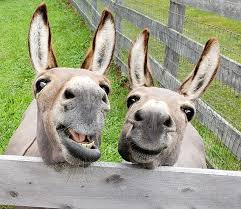

In [ ]:
from fastai.vision.all import *
im = Image.open("donkey000001.png")
im.to_thumb(256,256)

In [11]:
search_images("horse", 1)

2025-08-06 20:08:17,846 - INFO - icrawler.crawler - start crawling...
2025-08-06 20:08:17,848 - INFO - icrawler.crawler - starting 1 feeder threads...
2025-08-06 20:08:17,854 - INFO - feeder - thread feeder-001 exit
2025-08-06 20:08:17,857 - INFO - icrawler.crawler - starting 1 parser threads...
2025-08-06 20:08:17,862 - INFO - icrawler.crawler - starting 1 downloader threads...


Searching for 'horse'


2025-08-06 20:08:20,276 - INFO - parser - parsing result page https://www.google.com/search?q=horse&ijn=0&start=0&tbs=&tbm=isch
2025-08-06 20:08:21,579 - INFO - downloader - image #1	https://upload.wikimedia.org/wikipedia/commons/d/de/Nokota_Horses_cropped.jpg
2025-08-06 20:08:22,173 - INFO - downloader - downloaded images reach max num, thread downloader-001 is ready to exit
2025-08-06 20:08:22,173 - INFO - downloader - thread downloader-001 exit
2025-08-06 20:08:22,579 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2025-08-06 20:08:22,579 - INFO - parser - thread parser-001 exit
2025-08-06 20:08:22,874 - INFO - icrawler.crawler - Crawling task done!


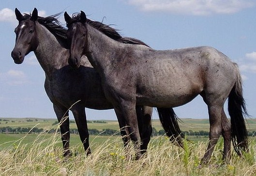

In [12]:
im = Image.open("horse000001.png")
im.to_thumb(256,256)

In [ ]:
no_of_photos = 20

searches = 'forest','bird','horse','donkey','certificate'

path = Path('dataset')
from time import sleep

for o in searches:
    dest = (path/o)
    print(f'This is dest, {dest}')
    dest.mkdir(exist_ok=True, parents=True)
    search_images(f"{o} photo", no_of_photos, dest)
    sleep(10)
    search_images(f"{o} sun photo", no_of_photos, dest)
    sleep(10)
    search_images(f"{o} night photo", no_of_photos, dest) 
    sleep(10)
    print(f"Photos of {o} completed!")

resize_images(path, max_size=400, dest=path, recurse=True)
print(f"Photos resized!")

2025-08-06 20:08:45,520 - INFO - icrawler.crawler - start crawling...
2025-08-06 20:08:45,521 - INFO - icrawler.crawler - starting 1 feeder threads...
2025-08-06 20:08:45,527 - INFO - feeder - thread feeder-001 exit
2025-08-06 20:08:45,538 - INFO - icrawler.crawler - starting 1 parser threads...
2025-08-06 20:08:45,547 - INFO - icrawler.crawler - starting 1 downloader threads...


This is dest, dataset\forest
Searching for 'forest photo'


2025-08-06 20:08:48,149 - INFO - parser - parsing result page https://www.google.com/search?q=forest+photo&ijn=0&start=0&tbs=&tbm=isch
2025-08-06 20:08:50,665 - ERROR - downloader - Response status code 400, file https://media.istockphoto.com/id/1419410282/photo/silent-forest-in-spring-with-beautiful-bright-sun-rays.jpg
2025-08-06 20:08:58,273 - INFO - downloader - image #1	https://media.cntraveler.com/photos/5eb18e42fc043ed5d9779733/4:3/w_3820,h_2865,c_limit/BlackForest-Germany-GettyImages-147180370.jpg
2025-08-06 20:08:59,057 - ERROR - downloader - Response status code 404, file https://t4.ftcdn.net/jpg
2025-08-06 20:08:59,539 - INFO - downloader - image #2	https://thumbs.dreamstime.com/b/forest-path-v3-13197528.jpg
2025-08-06 20:08:59,789 - INFO - downloader - image #3	https://thumbs.dreamstime.com/b/autumn-nature-landscape-colorful-forest-autumn-nature-landscape-colorful-forest-morning-sunlight-131400332.jpg
2025-08-06 20:09:00,170 - ERROR - downloader - Response status code 400, f

Searching for 'forest sun photo'


2025-08-06 20:10:03,320 - INFO - parser - parsing result page https://www.google.com/search?q=forest+sun+photo&ijn=0&start=0&tbs=&tbm=isch
2025-08-06 20:10:03,969 - ERROR - downloader - Response status code 400, file https://media.istockphoto.com/id/901134626/photo/sun-shining-in-a-forest.jpg
2025-08-06 20:10:04,252 - ERROR - downloader - Response status code 400, file https://media.istockphoto.com/id/498548086/photo/rays-of-sunlight-and-green-forest.jpg
2025-08-06 20:10:04,769 - INFO - downloader - image #1	https://www.shutterstock.com/image-photo/forest-sun-260nw-631284419.jpg
2025-08-06 20:10:13,093 - INFO - downloader - image #2	https://plus.unsplash.com/premium_photo-1669802766533-85e0624ff1bd?fm=jpg
2025-08-06 20:10:23,735 - INFO - downloader - image #3	https://i0.wp.com/picjumbo.com/wp-content/uploads/morning-sun-rays-in-green-forest-free-photo.jpg
2025-08-06 20:10:44,580 - INFO - downloader - image #4	https://plus.unsplash.com/premium_photo-1690482772122-b745b7a4343b?fm=jpg
202

Searching for 'forest night photo'


2025-08-06 20:12:20,479 - INFO - parser - parsing result page https://www.google.com/search?q=forest+night+photo&ijn=0&start=0&tbs=&tbm=isch
2025-08-06 20:12:21,416 - ERROR - downloader - Response status code 404, file https://t4.ftcdn.net/jpg
2025-08-06 20:12:22,180 - ERROR - downloader - Response status code 400, file https://media.istockphoto.com/id/532523359/photo/spooky-dark-forest-at-night-in-moonlight.jpg
2025-08-06 20:12:23,846 - INFO - downloader - image #1	https://images.pexels.com/photos/2885320/pexels-photo-2885320.jpeg?cs=srgb&dl=pexels-rpnickson-2885320.jpg
2025-08-06 20:12:27,276 - INFO - downloader - image #2	https://images.unsplash.com/photo-1483982258113-b72862e6cff6?fm=jpg
2025-08-06 20:12:27,622 - INFO - downloader - image #3	https://images.stockcake.com/public/1/d/c/1dce1ee7-1e86-4d51-925b-215025f04a50_large/starry-night-forest-stockcake.jpg
2025-08-06 20:12:27,875 - INFO - downloader - image #4	https://static.vecteezy.com/system/resources/thumbnails/031/229/226/sm

Photos of forest completed!
This is dest, dataset\bird
Searching for 'bird photo'


2025-08-06 20:13:42,524 - INFO - parser - parsing result page https://www.google.com/search?q=bird+photo&ijn=0&start=0&tbs=&tbm=isch
2025-08-06 20:13:44,656 - INFO - downloader - image #1	https://images.pexels.com/photos/1661179/pexels-photo-1661179.jpeg?cs=srgb&dl=pexels-roshan-kamath-793618-1661179.jpg
2025-08-06 20:13:45,222 - ERROR - downloader - Response status code 400, file https://media.istockphoto.com/id/183412466/photo/eastern-bluebirds-male-and-female.jpg
2025-08-06 20:13:45,887 - INFO - downloader - image #2	https://images.news18.com/webstories/uploads/2024/09/1-2024-09-47882c5e5f75d0e0fbe7e184fda57d17.png
2025-08-06 20:13:47,791 - INFO - downloader - image #3	https://images.unsplash.com/photo-1486365227551-f3f90034a57c?fm=jpg
2025-08-06 20:13:48,096 - INFO - downloader - image #4	https://i.pinimg.com/236x/46/78/c2/4678c25fbdf394b37e7e313c23ba4d1e.jpg
2025-08-06 20:13:48,588 - INFO - downloader - image #5	https://cdn.shopify.com/s/files/1/0782/9346/7416/files/European_rolle

Searching for 'bird sun photo'


2025-08-06 20:14:22,839 - INFO - parser - parsing result page https://www.google.com/search?q=bird+sun+photo&ijn=0&start=0&tbs=&tbm=isch
2025-08-06 20:14:24,887 - INFO - downloader - image #1	https://upload.wikimedia.org/wikipedia/commons/6/6a/Bird_reached_sun.jpg
2025-08-06 20:14:33,714 - INFO - downloader - image #2	https://images.unsplash.com/photo-1646160492205-21525c422829?fm=jpg
2025-08-06 20:14:34,289 - INFO - downloader - image #3	https://thumbs.dreamstime.com/b/birds-sun-12822368.jpg
2025-08-06 20:14:34,744 - ERROR - downloader - Response status code 400, file https://media.istockphoto.com/id/973092094/photo/gulls-flying-under-the-sun-x2.jpg
2025-08-06 20:14:36,726 - INFO - downloader - image #4	https://static.vecteezy.com/system/resources/thumbnails/051/184/453/small_2x/a-silhouetted-bird-perched-on-a-tree-branch-against-a-vibrant-sunset-with-the-sun-setting-behind-distant-mountains-and-warm-orange-hues-filling-the-sky-photo.jpg
2025-08-06 20:14:39,945 - INFO - downloader - i

Searching for 'bird night photo'


2025-08-06 20:15:16,774 - INFO - parser - parsing result page https://www.google.com/search?q=bird+night+photo&ijn=0&start=0&tbs=&tbm=isch
2025-08-06 20:15:17,387 - INFO - downloader - image #1	https://cdn.prod.website-files.com/623236d8ac23bb57bd352b40/62c547d173f9b44a1185001e_erik-karits-u8YubZlQOis-unsplash.jpg
2025-08-06 20:15:18,010 - ERROR - downloader - Response status code 400, file https://media.istockphoto.com/id/1333237768/photo/spooky-halloween-sky.jpg
2025-08-06 20:15:18,343 - ERROR - downloader - Response status code 400, file https://media.istockphoto.com/id/1257912862/photo/flock-of-migrating-ducks-and-geese-flying-in-front-of-full-moon.jpg
2025-08-06 20:15:19,389 - INFO - downloader - image #2	https://static.vecteezy.com/system/resources/thumbnails/033/119/817/small_2x/blue-bird-in-night-glowing-space-generate-ai-photo.jpg
2025-08-06 20:15:20,462 - INFO - downloader - image #3	https://www.shutterstock.com/image-photo/geese-flying-front-full-moon-600nw-2426544369.jpg
20

Photos of bird completed!
This is dest, dataset\horse
Searching for 'horse photo'


2025-08-06 20:16:02,804 - INFO - parser - parsing result page https://www.google.com/search?q=horse+photo&ijn=0&start=0&tbs=&tbm=isch
2025-08-06 20:16:03,204 - INFO - downloader - image #1	https://thumbs.dreamstime.com/b/brown-horse-running-desert-sand-mane-flowing-wind-blue-sky-backdrop-freedom-wild-spirit-concept-363389360.jpg
2025-08-06 20:16:03,685 - ERROR - downloader - Response status code 400, file https://media.istockphoto.com/id/521697371/photo/brown-pedigree-horse.jpg
2025-08-06 20:16:04,039 - INFO - downloader - image #2	https://i.pinimg.com/236x/8e/10/ce/8e10cedf485814722d35f1c907c0cbf5.jpg
2025-08-06 20:16:04,866 - INFO - downloader - image #3	https://www.shutterstock.com/image-photo/view-white-horses-galloping-along-600nw-2533335013.jpg
2025-08-06 20:16:05,470 - INFO - downloader - image #4	https://m.media-amazon.com/images/I/71u4fU6AWEL.jpg
2025-08-06 20:16:05,739 - INFO - downloader - image #5	https://static.vecteezy.com/system/resources/thumbnails/021/643/876/small_2x/

Searching for 'horse sun photo'


2025-08-06 20:16:56,888 - INFO - parser - parsing result page https://www.google.com/search?q=horse+sun+photo&ijn=0&start=0&tbs=&tbm=isch
2025-08-06 20:16:57,587 - ERROR - downloader - Response status code 400, file https://media.istockphoto.com/id/497480074/photo/brown-horse-in-sunset.jpg
2025-08-06 20:16:58,103 - INFO - downloader - image #1	https://www.shutterstock.com/image-photo/white-stallion-sunset-260nw-58274875.jpg
2025-08-06 20:16:58,371 - INFO - downloader - image #2	https://images.stockcake.com/public/3/d/3/3d3137ac-9363-4a83-8513-f02d6e301e99_large/sunset-galloping-horse-stockcake.jpg
2025-08-06 20:17:00,301 - INFO - downloader - image #3	https://thepeppystore.in/cdn/shop/files/81YZsvLJe-L._SY679.jpg
2025-08-06 20:17:00,703 - INFO - downloader - image #4	https://www.shutterstock.com/image-photo/beautiful-arabian-horse-silhouette-against-260nw-62315617.jpg
2025-08-06 20:17:01,935 - INFO - downloader - image #5	https://www.theatrang.com/cdn/shop/files/21_4_a3a12731-864f-49d2

Searching for 'horse night photo'


2025-08-06 20:17:47,996 - INFO - parser - parsing result page https://www.google.com/search?q=horse+night+photo&ijn=0&start=0&tbs=&tbm=isch
2025-08-06 20:17:48,593 - ERROR - downloader - Response status code 400, file https://media.istockphoto.com/id/504579508/photo/pasture-in-the-moonlight.jpg
2025-08-06 20:17:48,908 - ERROR - downloader - Response status code 400, file https://media.istockphoto.com/id/165834177/photo/night-gallop.jpg
2025-08-06 20:17:49,278 - ERROR - downloader - Response status code 400, file https://media.istockphoto.com/id/1165496945/photo/dark-horse-in-silhouette-only-lit-by-moon-light.jpg
2025-08-06 20:17:51,211 - INFO - downloader - image #1	https://thumbs.dreamstime.com/b/beautiful-black-horse-galloping-night-beach-misty-sea-as-backdrop-its-hooves-kicking-up-water-ai-generative-majestic-272207354.jpg
2025-08-06 20:17:51,707 - INFO - downloader - image #2	https://thumbs.dreamstime.com/b/horse-night-sky-silhouette-moon-45514219.jpg
2025-08-06 20:17:53,005 - INFO

Photos of horse completed!
This is dest, dataset\donkey
Searching for 'donkey photo'


2025-08-06 20:18:27,657 - INFO - parser - parsing result page https://www.google.com/search?q=donkey+photo&ijn=0&start=0&tbs=&tbm=isch
2025-08-06 20:18:28,706 - ERROR - downloader - Response status code 404, file https://t4.ftcdn.net/jpg
2025-08-06 20:18:29,046 - INFO - downloader - image #1	https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSu1d6N_mpGlK7KA8VWe9Ernb1XIK4Jd4Upng
2025-08-06 20:18:29,474 - ERROR - downloader - Response status code 400, file https://media.istockphoto.com/id/2159593477/photo/two-donkeys.jpg
2025-08-06 20:18:29,922 - INFO - downloader - image #2	https://cdn.britannica.com/68/143568-050-5246474F/Donkey.jpg
2025-08-06 20:18:33,487 - INFO - downloader - image #3	https://cdn.mos.cms.futurecdn.net/PabJFgLVqABki76HHvPY7P.jpg
2025-08-06 20:18:34,369 - INFO - downloader - image #4	https://upload.wikimedia.org/wikipedia/commons/1/1a/Donkey_in_Clovelly%2C_North_Devon%2C_England.jpg
2025-08-06 20:18:35,416 - ERROR - downloader - Response status code 403, file https:

Searching for 'donkey sun photo'


2025-08-06 20:19:16,182 - INFO - parser - parsing result page https://www.google.com/search?q=donkey+sun+photo&ijn=0&start=0&tbs=&tbm=isch
2025-08-06 20:19:17,086 - INFO - downloader - image #1	https://www.shutterstock.com/image-photo/brown-donkey-waiting-sun-260nw-1158015616.jpg
2025-08-06 20:19:18,329 - INFO - downloader - image #2	https://images.stockcake.com/public/f/8/9/f896022b-630b-47b0-8131-895328bb2535_large/donkey-at-sunset-stockcake.jpg
2025-08-06 20:19:24,324 - INFO - downloader - image #3	https://c8.alamy.com/comp/2FNPWTK/chilling-in-the-sun-donkey-2FNPWTK.jpg
2025-08-06 20:19:24,991 - INFO - downloader - image #4	https://thumbs.dreamstime.com/b/silhouette-donkey-sun-sunset-silhouette-donkey-sun-sunset-pasture-116175376.jpg
2025-08-06 20:19:26,729 - ERROR - downloader - Response status code 400, file https://media.istockphoto.com/id/915652132/photo/skiny-donkey-under-the-sun-at-the-fields-a-hot-day.jpg
2025-08-06 20:19:29,186 - INFO - downloader - image #5	https://www.shut

Searching for 'donkey night photo'


2025-08-06 20:20:23,571 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 20:20:28,601 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 20:20:33,203 - ERROR - parser - Exception caught when fetching page https://www.google.com/search?q=donkey+night+photo&ijn=0&start=0&tbs=&tbm=isch, error: ('Connection broken: IncompleteRead(7428 bytes read, 2812 more expected)', IncompleteRead(7428 bytes read, 2812 more expected)), remaining retry times: 2
2025-08-06 20:20:33,239 - ERROR - parser - Exception caught when fetching page https://www.google.com/search?q=donkey+night+photo&ijn=0&start=0&tbs=&tbm=isch, error: HTTPSConnectionPool(host='www.google.com', port=443): Max retries exceeded with url: /search?q=donkey+night+photo&ijn=0&start=0&tbs=&tbm=isch (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000020FB2A3EA80>: Failed to resolve 'www.google.com' ([Errno 11001] getaddrinfo failed)")), remaining

Photos of donkey completed!
This is dest, dataset\certificate
Searching for 'certificate photo'


2025-08-06 20:20:51,350 - INFO - parser - parsing result page https://www.google.com/search?q=certificate+photo&ijn=0&start=0&tbs=&tbm=isch
2025-08-06 20:20:52,683 - ERROR - downloader - Response status code 403, file https://www.yourprint.in/new-admin-ajax.php?action=resize_outer_image&cfcache=all&url=med-s3/d-i-o/Certificates/certificate_vl_pat_d1_o.jpg
2025-08-06 20:20:53,331 - INFO - downloader - image #1	https://marketplace.canva.com/EAFlVDzb7sA/3/0/1600w/canva-white-gold-elegant-modern-certificate-of-participation-Qn4Rei141MM.jpg
2025-08-06 20:20:53,665 - INFO - downloader - image #2	https://images-eu.ssl-images-amazon.com/images/I/817ZMt8IVvS._AC_UL495_SR435,495_.jpg
2025-08-06 20:20:54,085 - INFO - downloader - image #3	https://static.vecteezy.com/system/resources/previews/002/349/754/non_2x/modern-elegant-certificate-template-free-vector.jpg
2025-08-06 20:20:54,598 - ERROR - downloader - Response status code 400, file https://media.istockphoto.com/id/1312924009/vector/professi

Searching for 'certificate sun photo'


2025-08-06 20:21:30,632 - INFO - parser - parsing result page https://www.google.com/search?q=certificate+sun+photo&ijn=0&start=0&tbs=&tbm=isch
2025-08-06 20:21:35,981 - INFO - downloader - image #1	https://premaseem.wordpress.com/wp-content/uploads/2016/04/java_progrmmer_certificate.jpg
2025-08-06 20:21:38,072 - INFO - downloader - image #2	https://img.freepik.com/free-vector/certificate-appreciation-with-golden-frame-bow-sun_23-2148413859.jpg
2025-08-06 20:21:39,574 - INFO - downloader - image #3	https://static.vecteezy.com/system/resources/previews/002/854/787/non_2x/school-diploma-template-certificate-and-awards-for-kids-award-apretiation-flowers-and-sun-free-vector.jpg
2025-08-06 20:21:42,555 - INFO - downloader - image #4	http://www.marzconsulting.com/images/fredcert.jpg
2025-08-06 20:21:43,425 - INFO - downloader - image #5	https://www.shutterstock.com/image-vector/collection-circle-postage-stamps-banners-600nw-2452756403.jpg
2025-08-06 20:21:44,872 - INFO - downloader - image #

Searching for 'certificate night photo'


2025-08-06 20:23:22,451 - INFO - parser - parsing result page https://www.google.com/search?q=certificate+night+photo&ijn=0&start=0&tbs=&tbm=isch
2025-08-06 20:23:23,302 - INFO - downloader - image #1	https://www.shutterstock.com/image-illustration/red-maroon-laurel-golden-stage-600nw-2128478717.jpg
2025-08-06 20:23:24,948 - INFO - downloader - image #2	https://d1csarkz8obe9u.cloudfront.net/posterpreviews/trivia-night-winner-certificate-template-design-0f436d5fbc1b24e4ece89a10fe247426_screen.jpg
2025-08-06 20:23:27,313 - INFO - downloader - image #3	https://d1csarkz8obe9u.cloudfront.net/posterpreviews/trivia-night-winner-certificate-template-%282%29-design-a9e33333efd1c7b72ecb90fbf4ec32fd_screen.jpg
2025-08-06 20:23:30,526 - INFO - downloader - image #4	https://img.freepik.com/premium-vector/certificate-diploma-retro-design-template-vector-illustration_12454-9448.jpg
2025-08-06 20:23:32,925 - INFO - downloader - image #5	https://d1csarkz8obe9u.cloudfront.net/posterpreviews/trivia-night

Photos of certificate completed!
Photos resized!


In [14]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

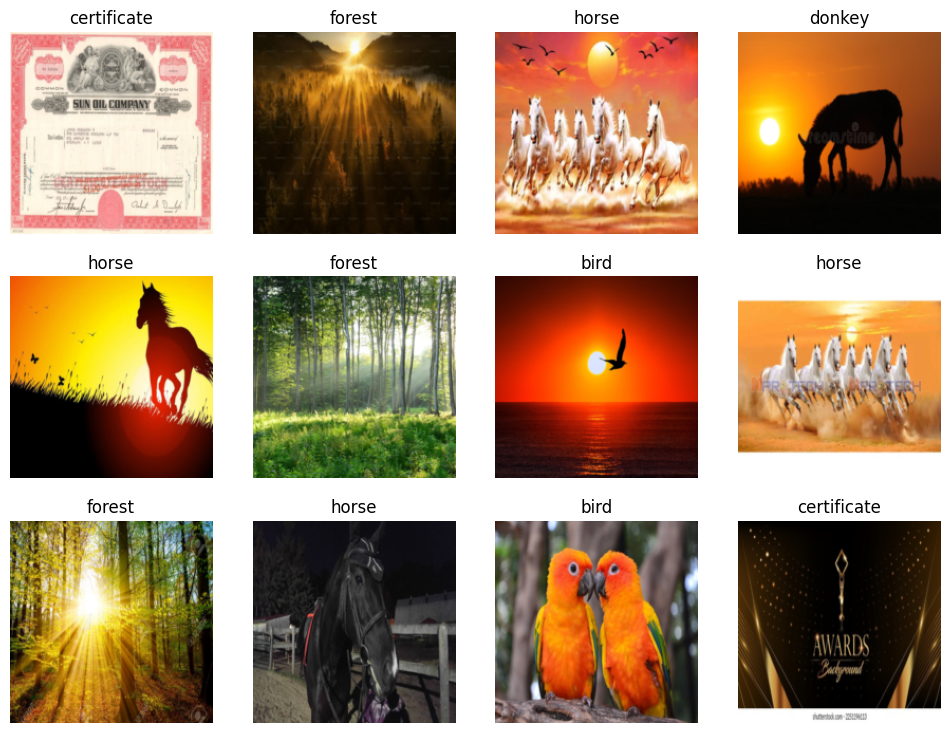

In [15]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=12)

In [16]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\unique/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:30<00:00, 1.53MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.267940,1.160999,0.415094,00:13


epoch,train_loss,valid_loss,error_rate,time
0,0.595302,0.547621,0.188679,00:19
1,0.478053,0.273488,0.132075,00:19
2,0.376804,0.227710,0.075472,00:18
3,0.274307,0.251254,0.075472,00:18
4,0.216462,0.173911,0.056604,00:18
5,0.169572,0.160598,0.037736,00:18
6,0.136489,0.157833,0.018868,00:18
7,0.112998,0.154642,0.037736,00:19
8,0.093991,0.156842,0.037736,00:19
9,0.081194,0.160057,0.037736,00:19


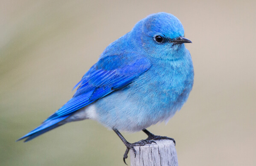

In [24]:
im = Image.open("C:/Users/unique/Documents/HorseBreeds.jpg")
im.to_thumb(256,256)

In [ ]:
classes = list(learn.dls.vocab)

print(classes)

['bird', 'certificate', 'donkey', 'forest', 'horse']


In [ ]:
predicted_class,_,probs = learn.predict(im)
print(f"This is a: {predicted_class}.")
predicted_idx = classes.index(predicted_class)

for idx, ele in enumerate(classes):
    print(f"Probability it's a {ele}: {probs[idx]:.4f}")

This is a: bird.
Probability it's a bird: 0.9991
Probability it's a certificate: 0.0002
Probability it's a donkey: 0.0005
Probability it's a forest: 0.0002
Probability it's a horse: 0.0000


In [ ]:
#export the model
learn.export('model.pkl')